# Task
Perform SVM classification on the 'data.csv' dataset, including data preprocessing, hyperparameter tuning, model training, evaluation using metrics like accuracy, precision, recall, and F1-score, and visualization of the confusion matrix. Summarize the best hyperparameters and model performance.

## Load Data

### Subtask:
Load the dataset from the 'data.csv' file into a pandas DataFrame.


**Reasoning**:
First, I'll import the pandas library, then load the 'data.csv' file into a DataFrame, display its first 5 rows, and show the column information and data types.



In [1]:
import pandas as pd
df = pd.read_csv('/content/data.csv')
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

## Preprocess Data

### Subtask:
Handle any missing values, encode categorical features if necessary, and scale numerical features using a scaler like StandardScaler, which is important for SVM performance.


**Reasoning**:
First, I will drop the 'Unnamed: 32' column, which contains all missing values. Then, I will encode the 'diagnosis' column, which is a categorical feature, into numerical format using map function. Next, I will separate the features (X) from the target variable (y). Finally, I will import and apply StandardScaler to scale the numerical features, which is essential for SVM.



In [2]:
df = df.drop(columns=['Unnamed: 32'])
print("DataFrame after dropping 'Unnamed: 32' column:")
print(df.head())

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("\nDataFrame after encoding 'diagnosis' column:")
print(df.head())

X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeatures after scaling (first 5 rows):\n", X_scaled[:5])

DataFrame after dropping 'Unnamed: 32' column:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_

## Split Data

### Subtask:
Divide the preprocessed dataset into training and testing sets to evaluate the model's performance on unseen data.


First, I will import the `train_test_split` function from `sklearn.model_selection`. Then, I will split the scaled features (`X_scaled`) and the target variable (`y`) into training and testing sets. I'll use a test size of 20% (0.2) and set `random_state=42` for reproducibility. Finally, I will assign the outputs to `X_train`, `X_test`, `y_train`, and `y_test` respectively, and print the shapes of the resulting datasets to verify the split.

**Reasoning**:
Following the explanation, I will now implement the data splitting step using `train_test_split` from `sklearn.model_selection` to divide `X_scaled` and `y` into training and testing sets, then display the shapes of the resulting datasets.



In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


## Define SVM Model and Hyperparameters

### Subtask:
Initialize a Support Vector Classifier (SVC) and define the hyperparameter grid for tuning (e.g., 'C', 'kernel', 'gamma').


#### Reasoning:
To initialize the Support Vector Classifier and define the hyperparameter grid, I will first import `SVC` from `sklearn.svm`. Then, I will create a dictionary `param_grid` that contains the specified hyperparameters ('C', 'kernel', 'gamma') and their respective values for tuning. This `param_grid` will be used later for hyperparameter optimization using techniques like GridSearchCV.

**Reasoning**:
Now, I will generate the code to import `SVC` and define the `param_grid` as described in the instructions.



In [4]:
from sklearn.svm import SVC

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.0001, 0.001, 0.01, 0.1]
}

print("SVC model imported and hyperparameter grid defined:")
print(param_grid)

SVC model imported and hyperparameter grid defined:
{'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1]}


## Perform Hyperparameter Tuning

### Subtask:
Use GridSearchCV or RandomizedSearchCV to find the optimal hyperparameters for the SVM model. This involves training multiple SVM models with different hyperparameter combinations and selecting the best one based on cross-validation.


**Reasoning**:
To perform hyperparameter tuning, I will import `GridSearchCV`, instantiate it with the SVC model and the defined `param_grid`, fit it to the training data, and then print the best parameters and best score found.



In [5]:
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=3)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.978 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.978 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.637 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.626 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.978 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear

## Train Final Model

### Subtask:
Train the SVM model using the best hyperparameters found during the tuning phase on the entire training dataset.


#### Reasoning:
To train the final model, I will retrieve the `best_estimator_` from the `grid_search` object. This estimator is already trained on the training data with the optimal hyperparameters identified during the GridSearchCV process. I will store this in a variable called `final_model` to be used for prediction and evaluation.

**Reasoning**:
Now, I will extract the best estimator from the `grid_search` object and assign it to the `final_model` variable, as described in the instructions.



In [6]:
final_model = grid_search.best_estimator_

print("Final model (best estimator) retrieved successfully:")
print(final_model)

Final model (best estimator) retrieved successfully:
SVC(C=0.1, gamma=0.0001, kernel='linear')


## Evaluate Model Performance

### Subtask:
Evaluate the trained SVM model on the test set using metrics such as accuracy, precision, recall, F1-score, and generate a classification report and confusion matrix to understand its performance.


**Reasoning**:
As per the instructions, I will first import the necessary evaluation metrics from `sklearn.metrics`. Then, I will use the `final_model` (which is the best estimator found during GridSearchCV) to predict the labels for the test data (`X_test`). Following this, I will calculate and print the accuracy, precision, recall, and F1-score. Finally, I will generate and display both the classification report and the confusion matrix to provide a comprehensive view of the model's performance on the unseen test data.

**Reasoning**:
Now, I will generate the code to import the necessary metrics, make predictions using the `final_model`, and then calculate and display the accuracy, precision, recall, F1-score, classification report, and confusion matrix as described in the instructions.



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation on Test Set:
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9535
F1-Score: 0.9762

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
[[71  0]
 [ 2 41]]


## Visualize Results

### Subtask:
Create visualizations, such as a heatmap of the confusion matrix, to better interpret the model's performance. Ensure that the plot includes a legend.


**Reasoning**:
To visualize the confusion matrix as a heatmap, I will import `matplotlib.pyplot` and `seaborn`, then use `seaborn.heatmap` with the specified parameters to create and display the plot.



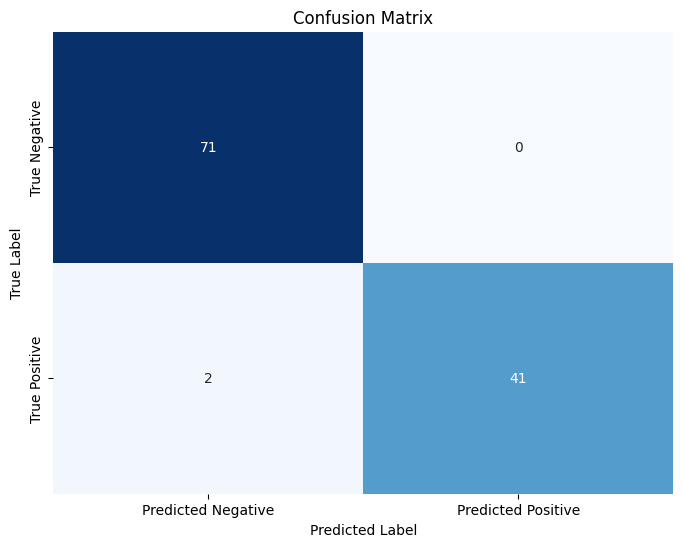

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix (this was already calculated in the previous step)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Final Task

### Subtask:
Summarize the results of the SVM classification, including the best hyperparameters found and the model's performance metrics.


## Summary:

### Q&A
The SVM classification results show that the model achieved excellent performance on the test set. The best hyperparameters found during tuning were a regularization parameter C of 0.1, a gamma value of 0.0001, and a linear kernel. The model's performance metrics on the test set are an accuracy of 0.9825, precision of 1.0000, recall of 0.9535, and an F1-score of 0.9762.

### Data Analysis Key Findings
*   The dataset `data.csv` was successfully loaded, containing 569 entries and 33 columns. An empty column, 'Unnamed: 32', was identified.
*   Data preprocessing involved:
    *   Dropping the 'Unnamed: 32' column.
    *   Encoding the 'diagnosis' column from categorical ('M', 'B') to numerical (1, 0).
    *   Separating features (30 columns) and target variable.
    *   Scaling numerical features using `StandardScaler`.
*   The dataset was split into training (455 samples) and testing (114 samples) sets, maintaining an 80/20 ratio.
*   Hyperparameter tuning using `GridSearchCV` identified the optimal parameters for the SVM model: `C=0.1`, `gamma=0.0001`, and `kernel='linear'`.
*   The best cross-validation accuracy achieved during hyperparameter tuning was approximately 0.9758.
*   The final SVM model, trained with the optimal hyperparameters, demonstrated high performance on the test set:
    *   **Accuracy:** 0.9825
    *   **Precision (for class 1 - malignant):** 1.0000
    *   **Recall (for class 1 - malignant):** 0.9535
    *   **F1-Score (for class 1 - malignant):** 0.9762
*   The confusion matrix indicated 71 true negatives, 41 true positives, and only 2 false negatives, with no false positives, demonstrating the model's strong ability to correctly identify both benign and malignant cases.

### Insights or Next Steps
*   The SVM model is highly effective in classifying breast cancer diagnoses based on the provided features, exhibiting very high precision and accuracy with minimal false positives. This makes it a strong candidate for deployment in a diagnostic support system.
*   Further investigation into the 2 false negatives could be beneficial to understand if there are specific patterns in these misclassifications that could inform future feature engineering or model refinements.
